# `pandas dtypes` 

In [Section 1.1](./1_1_introduction_to_pandas.ipynb), we took our first look at the `pandas.DataFrame`.  In this section, we will take a closer look at `pandas` column types.

In [1]:
import pandas as pd
from dfply import *
#!pip install unpythonic

## Hiding stack traceback

We hide the exception traceback for didactic reasons (code source: [see this post](https://stackoverflow.com/questions/46222753/how-do-i-suppress-tracebacks-in-jupyter)).  Don't run this cell if you want to see a full traceback.

In [2]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

## Outline

* Three more `dtypes`
    * `datetime`
    * `Int64`
    * `category`
* Setting the `dtypes` at read time.

## Integers with missing values

* Older `pandas` $\rightarrow$ no missing `int`
    * Use `float` instead
* Latest version $\rightarrow$ `Int` classes
    * Notice the capital `I`

## Example - Artist `BeginDate` and `EndDate`

In [3]:
artist = pd.read_csv('./data/Artists.csv')
artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## There are lots of `0`s in the `BeginDate` 

Do we really think the Museam of **Modern** Art has artists from 0AD?

<AxesSubplot:>

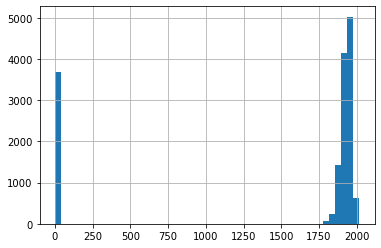

In [4]:
import matplotlib.pylab as plt
%matplotlib inline
artist.BeginDate.hist(bins=50)

## Same problem with `EndDate`, but even more so

<AxesSubplot:>

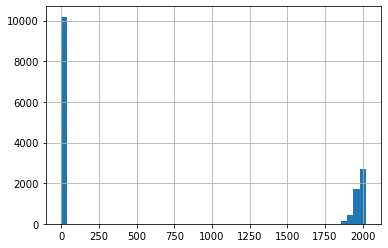

In [5]:
artist.EndDate.hist(bins=50)

## Using `apply` to remove the `0`s

In [6]:
transformed_BD = artist.BeginDate.apply(lambda val: np.nan if val == 0 else val)
transformed_BD.head()

0    1930.0
1    1936.0
2    1941.0
3    1946.0
4    1941.0
Name: BeginDate, dtype: float64

## What's up with the `float dtype`?

Good question, let's find out.

## Converting transformed `BeginDate` - attempt 1

Let's try to convert the `BeginDate` to `int`

In [7]:
transformed_BD.astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

## `pandas`, `int` and `np.nan` don't mix

* `pandas` `int` columns **cannot** have missing
* `pd.__version__ == 0.24.1` fixes this
    * Use `Int64` for integers with missing values
    * Note the capital `I`
* Update with `!pip install --upgrade pandas`

In [8]:
# TODO Make this future proof
#assert pd.__version__.startswith('0.24'), "Please upgrade your pandas and restart jupyter"
#!pip install --upgrade pandas

## Converting `BeginDate` to `Int64`

Hmm, that returned a `float` column.  Let's try to force `Int64`

In [9]:
transformed_BD.astype('Int64').head(15) # There we go!

0     1930
1     1936
2     1941
3     1946
4     1941
5     1925
6     1941
7     1923
8     1918
9     1886
10    1936
11    1911
12    1907
13    1900
14    <NA>
Name: BeginDate, dtype: Int64

## Example 2 - Uber rides

**Source:** [FiveThirtyEight Uber data](https://github.com/fivethirtyeight/uber-tlc-foil-response)

**Note:** The actual data is pretty large, which we will deal with in the next section.  For now, we will load a subset (first 1000 rows).

In [10]:
#uber_april_raw = pd.read_csv("./data/uber-raw-data-apr14-small.csv")
#uber_april_raw.head()

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv", 
                 nrows = 1000)
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## <font color="red"> Exercise 1</font>

Fix the names.  Be sure to rename the `"Date/Time"` `'date'` and name the resulting data frame `uber_april_renamed`.

In [13]:
# Your code here
uber_april_renamed = (df >> 
                       rename(date = X['Date/Time']))
uber_april_renamed

,date,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
995,4/1/2014 22:57:00,40.7218,-73.9975,B02512
996,4/1/2014 23:00:00,40.7051,-73.9205,B02512
997,4/1/2014 23:01:00,40.7426,-74.0042,B02512
998,4/1/2014 23:01:00,40.7554,-73.9702,B02512


## <font color="red"> Exercise 2</font>

**Tasks:**

1. Inspect the `dtypes`
2. Suggest a good type for the `date` column

In [14]:
# Your code here
uber_april_renamed.dtypes

date     object
Lat     float64
Lon     float64
Base     object
dtype: object

> A good type for the date column would be the datetime dtype.

## Changing to date type with  `pd.to_datetime`

In [15]:
pd.to_datetime(uber_april_renamed.date.head())

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: date, dtype: datetime64[ns]

## Making a `dfply` compatible column function.

Suppose you have a function you want to use inside `mutate` (i.e. a **column function**).  To make this function compatable with `dfply.Intention`s, you should 

1. Wrap the `pandas` call inside a function.
2. Decorate with `@make_symbolic`

In [19]:
@make_symbolic
def to_datetime(series, infer_datetime_format=True):
    return pd.to_datetime(series, infer_datetime_format=infer_datetime_format)

## Converting to dates with `dfply`

Note that above function is available in `more_dfply.to_datetime` is a `dfply` compatible version of `pd.to_datetime`.

In [20]:
from more_dfply import to_datetime
uber_april = (uber_april_renamed >>
                mutate(date = to_datetime(X.date)))
uber_april.dtypes

date    datetime64[ns]
Lat            float64
Lon            float64
Base            object
dtype: object

## Why convert to `datetime`?

This series type provides many useful date methods and attributes.  For example, we get many **dateparts methods** in the `dt` attribute.

In [21]:
uber_april_weekday = (uber_april >>
                        mutate(weekday = X.date.dt.weekday)
                     )
uber_april_weekday

,date,Lat,Lon,Base,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
995,2014-04-01 22:57:00,40.7218,-73.9975,B02512,1
996,2014-04-01 23:00:00,40.7051,-73.9205,B02512,1
997,2014-04-01 23:01:00,40.7426,-74.0042,B02512,1
998,2014-04-01 23:01:00,40.7554,-73.9702,B02512,1


In [22]:
X.date.dt.evaluate(uber_april_weekday)

In [23]:
dir(X.date.dt.evaluate(uber_april_weekday))

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

## <font color="red"> Exercise 3</font>

**Tasks:**

1. Use `dir` to inspect the dateparts found in `dt`
2. Add a few more datepart columns.
3. Name the resulting dataframe `uber_april_datepart`

In [24]:
# Your code here
dir(X.date.dt.evaluate(uber_april_weekday))

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [25]:
uber_april_datepart = (uber_april_weekday >>
                           mutate(year = X.date.dt.year) >>
                           mutate(date_only = X.date.dt.date) >>
                           mutate(time_only = X.date.dt.time) >>
                           mutate(year = X.date.dt.year) >>
                           mutate(month = X.date.dt.month) >>
                           mutate(day_of_year = X.date.dt.dayofyear)
                     )
uber_april_datepart

,date,Lat,Lon,Base,weekday,year,date_only,time_only,month,day_of_year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,2014,2014-04-01,00:11:00,4,91
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,2014,2014-04-01,00:17:00,4,91
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,2014,2014-04-01,00:21:00,4,91
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,2014,2014-04-01,00:28:00,4,91
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,2014,2014-04-01,00:33:00,4,91
...,...,...,...,...,...,...,...,...,...,...
995,2014-04-01 22:57:00,40.7218,-73.9975,B02512,1,2014,2014-04-01,22:57:00,4,91
996,2014-04-01 23:00:00,40.7051,-73.9205,B02512,1,2014,2014-04-01,23:00:00,4,91
997,2014-04-01 23:01:00,40.7426,-74.0042,B02512,1,2014,2014-04-01,23:01:00,4,91
998,2014-04-01 23:01:00,40.7554,-73.9702,B02512,1,2014,2014-04-01,23:01:00,4,91


## Specifying date columns while reading

Pass a list of date columns to `parse_dates`

In [26]:
from toolz import first
uber_april_with_datetime = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv", 
                                       nrows = 1000, 
                                       parse_dates=['Date/Time'])

uber_april_with_datetime.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

## Explicit date parsing

* Create a parser function
* Pass to `date_parser`
* Use if `pandas` fails to parse
* More information about format codes [here](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [27]:
dir(pd.datetime)

/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [44]:
dateparse = lambda x: pd.datetime.strptime(x, "%d-%m-%Y %H:%M:%S")
uber_april_parsered = (dateparse(uber_april_with_datetime)
                      
                      )
uber_april_parsered.head()

/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


TypeError: strptime() argument 1 must be str, not DataFrame

## Categorical dtype

* Similar to `R`s factor
* Allows for nominal or ordinal categories

In [29]:
uber_april_weekday_cat = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype('category')))
uber_april_weekday_cat.dtypes

date       datetime64[ns]
Lat               float64
Lon               float64
Base               object
weekday          category
dtype: object

## Let's plot the weekdays with `seaborn.catplot`

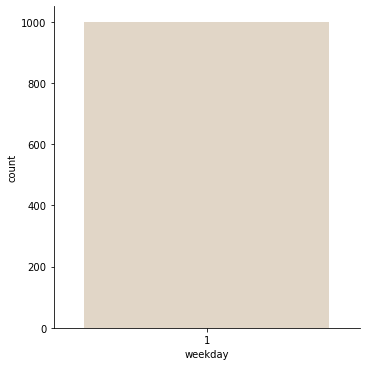

In [30]:
import seaborn as sns
sns.catplot(x="weekday", 
            kind="count", 
            palette="ch:.25", 
            data=uber_april_weekday_cat);

## Nominal by default

* Setting `'category'` makes this nominal
* Weekdays are actually ordinal
* Notice the alphabetical order in the plot.

## Making the data ordinal

1. Make a new category class with `CategoricalDtype`
2. Use `astype` with your new dtype class

#### Making an order weekday category

In [31]:
from calendar import day_name
list(day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [32]:
weekday_categories = pd.CategoricalDtype(categories=list(day_name),
                                     ordered=True)
weekday_categories

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

#### Changing to our custom type

In [33]:
uber_april_weekday_ord = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype(weekday_categories)))
uber_april_weekday_ord.dtypes

date       datetime64[ns]
Lat               float64
Lon               float64
Base               object
weekday          category
dtype: object

## Plot the ordinal weekdays with `seaborn.catplot`

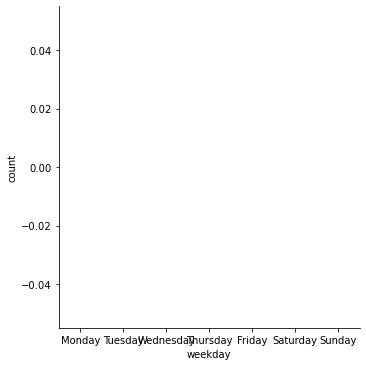

In [34]:
import seaborn as sns
sns.catplot(x="weekday", 
            kind="count", 
            palette="ch:.25", 
            data=uber_april_weekday_ord);

## <font color="red"> Exercise 4</font>

Sometimes there is an advantage to treating calendar years as ordinal data.  Perform the following steps on the `Artist` data loaded above.

**Tasks:**

1. Remove the `0` from `BeginDate` and switch the type to `Int64`.
2. Filter out the rows that are missing `BeginDate`
3. Determine the minimum and maximum values of the filtered `BeginDate`s
4. Create a new ordinal category class for this date range.
5. Use `sns.catplot` to plot the distribution of the dates.

In [35]:
artist.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [36]:
# Your code here
new_artist = artist[artist['BeginDate'] != 0]
transformed_artist = (new_artist >>
                      select(X['BeginDate'].astype('Int64')) >>
                      filter_by(X['BeginDate'].notnull()) >>
                      mutate(Date = X['BeginDate'].astype('category'))
                     )

transformed_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11549 entries, 0 to 15219
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BeginDate  11549 non-null  int64   
 1   Date       11549 non-null  category
dtypes: category(1), int64(1)
memory usage: 212.9 KB


In [37]:
transformed_artist.describe()

,BeginDate
count,11549.000000
mean,1930.561520
std,35.328344
min,1181.000000
25%,1909.000000
50%,1936.000000
75%,1955.000000
max,2017.000000


> *Your answer here*


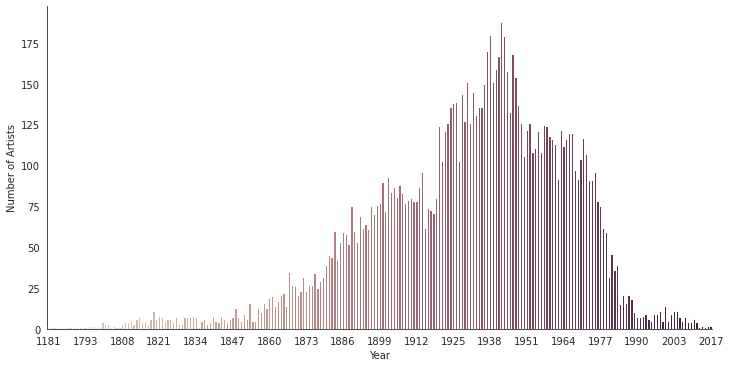

In [38]:
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(x = "Date",
                    data = transformed_artist,
                    kind = "count",
                    palette = "ch:.25",
                    aspect = 2
                   )
    g.set_xticklabels(step = 13)
    g.set(xlabel = "Year",
          ylabel = "Number of Artists")